# Анализ игровой индустрии

## Описание проекта  и цель

Вы работаете в интернет-магазине «Стримчик», который продаёт по всему миру компьютерные игры. Из открытых источников доступны исторические данные о продажах игр, оценки пользователей и экспертов, жанры и платформы (например, Xbox или PlayStation). Нужно выявить определяющие успешность игры закономерности. Это позволит сделать ставку на потенциально популярный продукт и спланировать рекламные кампании.  

Перед вами данные до 2016 года. Представим, что сейчас декабрь 2016 г., и вы планируете кампанию на 2017-й. Нужно отработать принцип работы с данными. Неважно, прогнозируете ли вы продажи на 2017 год по данным 2016-го или же 2027-й — по данным 2026 года.  

В наборе данных попадается аббревиатура ESRB (Entertainment Software Rating Board) — это ассоциация, определяющая возрастной рейтинг компьютерных игр. ESRB оценивает игровой контент и присваивает ему подходящую возрастную категорию, например, «Для взрослых», «Для детей младшего возраста» или «Для подростков».

## Описание данных  

Таблица games содержит информацию об играх

 - name — название игры
 - platform — платформа
 - year_of_release — год выпуска
 - genre — жанр игры
 - na_sales — продажи в Северной Америке (миллионы долларов) EU_sales — продажи в Европе (миллионы долларов)
 - jp_sales — продажи в Японии (миллионы долларов)
 - other_sales — продажи в других странах (миллионы долларов) Critic_Score — оценка критиков (от 0 до 100)
 - User_Score — оценка пользователей (от 0 до 10)
 - Rating — рейтинг от организации ESRB (англ. Entertainment Software Rating Board). Эта ассоциация определяет рейтинг компьютерных игр и присваивает им подходящую возрастную категорию.  
 
Данные за 2016 год могут быть неполными.

## План работы

1.Изучим общую информацию по файлу с данными.  
2.Подготовим данные: приведем к нижнему регистру названия столбцов, обработаем пропуски, проверим типы данных столбцов.  
3. Проведем исследовательский анализ данных: оценим количество выпущенных игр по годам и суммарные продажи по платформам. Выбор данных для анализа, определение потенциально прибыльных платформ. График boxplot для оценки разницы в продажах. Оценка влияния отзывов критиков и пользователей на продажи. Распределение игр по жанрам и определение самых продаваемых жанров.  
4.Составим портрет пользователя для различных регионов (NA, EU, JP): определим для каждого региона топ-5 популярных платформ и жанров. Оценим влияние рейтинга ESRB на продажи.  
5. Проверка гипотез:формулировка нулевой и альтернативной гипотезы и их проверка.   
6.Выводы

In [1]:
#импорты бибилиотек
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats as st

## 1. Откроем файл с данными и изучите общую информацию

In [2]:
df = pd.read_csv('games.csv')
df.head()

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN


In [3]:
df.shape

(16715, 11)

## 2. Подготовка данных

In [4]:
#Заменим названия столбцов (приведем к нижнему регистру)
df.columns = df.columns.str.lower()
df.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN


In [5]:
#Проверка на полные дубликаты
df.duplicated().sum()

0

In [6]:
#Посмотрим на типы данных
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16713 non-null  object 
 1   platform         16715 non-null  object 
 2   year_of_release  16446 non-null  float64
 3   genre            16713 non-null  object 
 4   na_sales         16715 non-null  float64
 5   eu_sales         16715 non-null  float64
 6   jp_sales         16715 non-null  float64
 7   other_sales      16715 non-null  float64
 8   critic_score     8137 non-null   float64
 9   user_score       10014 non-null  object 
 10  rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


Заменим тип данных в столбцах:  

 - year_of_release - год это целое число
 - critic_score - оценка это целое число
 - user_score - оценка это дробное число  
 
Для корректной замены типа необходимо сначала обработать пропуски в данных столбцах.


In [7]:
#Посмотрим как много пропусков в данных:
pd.DataFrame(round(df.isna().mean()*100,)).style.background_gradient('coolwarm')

,0
name,0.000000
platform,0.000000
year_of_release,2.000000
genre,0.000000
na_sales,0.000000
eu_sales,0.000000
jp_sales,0.000000
other_sales,0.000000
critic_score,51.000000
user_score,40.000000


In [8]:
#Посмотрим на пропуски в столбце year_of_release
df.loc[df.year_of_release.isna()]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
183,Madden NFL 2004,PS2,NaN,Sports,4.26,0.26,0.01,0.71,94.0,8.5,E
377,FIFA Soccer 2004,PS2,NaN,Sports,0.59,2.36,0.04,0.51,84.0,6.4,E
456,LEGO Batman: The Videogame,Wii,NaN,Action,1.80,0.97,0.00,0.29,74.0,7.9,E10+
475,wwe Smackdown vs. Raw 2006,PS2,NaN,Fighting,1.57,1.02,0.00,0.41,NaN,NaN,NaN
609,Space Invaders,2600,NaN,Shooter,2.36,0.14,0.00,0.03,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
16373,PDC World Championship Darts 2008,PSP,NaN,Sports,0.01,0.00,0.00,0.00,43.0,tbd,E10+
16405,Freaky Flyers,GC,NaN,Racing,0.01,0.00,0.00,0.00,69.0,6.5,T
16448,Inversion,PC,NaN,Shooter,0.01,0.00,0.00,0.00,59.0,6.7,M
16458,Hakuouki: Shinsengumi Kitan,PS3,NaN,Adventure,0.01,0.00,0.00,0.00,NaN,NaN,NaN


В столбце year_of_release всего 2% пропусков - мы можем удалить их, скорее всего такие пропуски произошли случайно, так как года пропущены на разных платформах и с разными играми. Так же мы знаем, что данные за 2016 год - не полные. 

In [9]:
#Удалим строки с пропущенными значениями в столбце year_of_release
df.dropna(subset=['year_of_release'], inplace=True) 
df.year_of_release.isna().sum()

0

В столбцах critic_score, user_score, rating - больше пропусков, поэтому мы не можем удалить эти строки. Но мы не можем также заменить их средним или медианой, так как это исказит результы анализа. Почти во всех строках оценки пропущены одновременно, возможно для каких-то игр не проводилась оценка или ее не фиксировали. Заменим пропуски на -1.

In [10]:
# Заменим пропуски в столбцах critic_score, user_score, rating на -1
df['critic_score'] = df['critic_score'].fillna(value=-1) 
df['user_score'] = df['user_score'].fillna(value=-1) 
df['rating'] = df['rating'].fillna(value=-1) 

Пропуски в столбцах name и genre встречаются всего два раза и похожи на случайные - их мы можем удалить.

In [11]:
#Удаляем пропуски в столбцах name и genre
df.dropna(subset=['name', 'genre'], inplace=True) 
df.isna().sum()

name               0
platform           0
year_of_release    0
genre              0
na_sales           0
eu_sales           0
jp_sales           0
other_sales        0
critic_score       0
user_score         0
rating             0
dtype: int64

In [12]:
#Посмотрим как часто встречается аббревиатура 'tbd' в столбце с оценкой пользователей
df.loc[df['user_score']=='tbd']

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
119,Zumba Fitness,Wii,2010.0,Sports,3.45,2.59,0.0,0.66,-1.0,tbd,E
301,Namco Museum: 50th Anniversary,PS2,2005.0,Misc,2.08,1.35,0.0,0.54,61.0,tbd,E10+
520,Zumba Fitness 2,Wii,2011.0,Sports,1.51,1.03,0.0,0.27,-1.0,tbd,T
645,uDraw Studio,Wii,2010.0,Misc,1.65,0.57,0.0,0.20,71.0,tbd,E
718,Just Dance Kids,Wii,2010.0,Misc,1.52,0.54,0.0,0.18,-1.0,tbd,E
...,...,...,...,...,...,...,...,...,...,...,...
16695,Planet Monsters,GBA,2001.0,Action,0.01,0.00,0.0,0.00,67.0,tbd,E
16697,Bust-A-Move 3000,GC,2003.0,Puzzle,0.01,0.00,0.0,0.00,53.0,tbd,E
16698,Mega Brain Boost,DS,2008.0,Puzzle,0.01,0.00,0.0,0.00,48.0,tbd,E
16704,Plushees,DS,2008.0,Simulation,0.01,0.00,0.0,0.00,-1.0,tbd,E


Аббревиатура tbd, возможно, означает to be determined - будет определено позднее, т.е. по сути это пропуск. Такие значения мы так же можем заменить на -1

In [13]:
# Заменим значение tbd в столбце user_score на -1
df.user_score = df.user_score.replace('tbd', -1)

In [14]:
#Преобразуем данные в нужные типы 
df = df.astype({'year_of_release':'int64', 'critic_score':'int64'})
df.user_score = df.user_score.astype('float64')
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16444 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16444 non-null  object 
 1   platform         16444 non-null  object 
 2   year_of_release  16444 non-null  int64  
 3   genre            16444 non-null  object 
 4   na_sales         16444 non-null  float64
 5   eu_sales         16444 non-null  float64
 6   jp_sales         16444 non-null  float64
 7   other_sales      16444 non-null  float64
 8   critic_score     16444 non-null  int64  
 9   user_score       16444 non-null  float64
 10  rating           16444 non-null  object 
dtypes: float64(5), int64(2), object(4)
memory usage: 1.5+ MB


In [15]:
#Посчитаем суммарные продажи во всех регионах и запишем их в отдельный столбец
df['total_sales'] = df['na_sales']+df['eu_sales']+df['jp_sales']+df['other_sales']
df.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,76,8.0,E,82.54
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,-1,-1.0,-1,40.24
2,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,82,8.3,E,35.52
3,Wii Sports Resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,80,8.0,E,32.77
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,-1,-1.0,-1,31.38


В результате подготовки данных:
 - приведены названия столбцов к нижнему регистру
 - проанализированы и устранены пропуски в данных, в тех случаях, где удалить пропуски невозможно - отсутствующие значения заменены на “-1”.
 - типы данных в столбцах приведены к нужному типу
 - добавлен столбец с суммарными продажами по всем регионам

## 3. Исследовательский анализ данных

In [16]:
#Посмотрим, сколько игр выпускалось в разные годы
df.groupby('year_of_release')['name'].count()

year_of_release
1980       9
1981      46
1982      36
1983      17
1984      14
1985      14
1986      21
1987      16
1988      15
1989      17
1990      16
1991      41
1992      43
1993      60
1994     121
1995     219
1996     263
1997     289
1998     379
1999     338
2000     350
2001     482
2002     829
2003     775
2004     762
2005     939
2006    1006
2007    1197
2008    1427
2009    1426
2010    1255
2011    1136
2012     653
2013     544
2014     581
2015     606
2016     502
Name: name, dtype: int64

In [17]:
df.query('year_of_release<1995')['name'].count()

486

Видно, что до 1995г. игр выпускалось в разы меньше (всего 486 за 15 лет), следовательно, мы можем взять для анализа период с 1995-2016гг.

In [18]:
#Посмотрим, как менялись продажи по платформам
platform_sales = df.groupby('platform')['total_sales'].sum().sort_values(ascending=False).head(10)
platform_sales

platform
PS2     1233.56
X360     961.24
PS3      931.34
Wii      891.18
DS       802.78
PS       727.58
PS4      314.14
GBA      312.88
PSP      289.53
3DS      257.81
Name: total_sales, dtype: float64

In [19]:
platform_sales.index

Index(['PS2', 'X360', 'PS3', 'Wii', 'DS', 'PS', 'PS4', 'GBA', 'PSP', '3DS'], dtype='object', name='platform')

In [20]:
#Выберем 10 платформ с наибольшими суммарными продажами и построим распределение продаж по годам
df_query = df.query("platform==list(@platform_sales.index)").pivot_table(index='platform', 
                                                                         columns='year_of_release', 
                                                                         values='total_sales', 
                                                                         aggfunc='sum')
df_query

year_of_release,1985,1994,1995,1996,1997,1998,1999,2000,2001,2002,...,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016
platform,,,,,,,,,,,,,,,,,,,,,
3DS,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,63.20,51.36,56.57,43.76,27.78,15.14
DS,0.02,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,146.94,145.31,119.54,85.02,26.18,11.01,1.54,NaN,NaN,NaN
GBA,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.07,61.53,74.16,...,3.40,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
PS,NaN,6.03,35.96,94.7,136.17,169.49,144.53,96.37,35.59,6.67,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
PS2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,39.17,166.43,205.38,...,75.99,53.90,26.40,5.64,0.45,NaN,NaN,NaN,NaN,NaN
PS3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,73.19,118.52,130.93,142.17,156.78,107.36,113.25,47.76,16.82,3.60
PS4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,25.99,100.00,118.90,69.25
PSP,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,46.93,34.55,37.78,35.04,17.82,7.69,3.14,0.24,0.12,NaN
Wii,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,152.77,171.32,206.97,127.95,59.65,21.71,8.59,3.75,1.14,0.18


Видно, что платформы появляются, функционируют определенное время, а затем исчезают. Попробуем определить "срок жизни" платформы.

In [21]:
data_grouped = df.query("platform==list(@platform_sales.index)").groupby('platform').agg(year_min = ('year_of_release','min'), 
                                                                                         year_max = ('year_of_release','max'))
data_grouped['duration'] = data_grouped['year_max']-data_grouped['year_min']
data_grouped

,year_min,year_max,duration
platform,,,
3DS,2011,2016,5
DS,1985,2013,28
GBA,2000,2007,7
PS,1994,2003,9
PS2,2000,2011,11
PS3,2006,2016,10
PS4,2013,2016,3
PSP,2004,2015,11
Wii,2006,2016,10


In [22]:
data_grouped.duration.mean()

10.5

Полатформы появляются и исчезают, в среднем, за 10 лет. Есть "долгожитель" - платформа DS продержалась 28 лет, скорее всего в эти годы у нее было мало конкурентов (либо это опечатка, так как мы видим продажи в 1985г., в следующих годах продаж нет и появляются снова они только в 2000-х).

С учетом этого, будем анализировать данные за последние 10 лет - период с 2006-2016гг.

In [23]:
#Возьмем данные за соответствующий актуальный период и далее будем анализировать их
actual_data = df.query('year_of_release>2005')
actual_data.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,76,8.0,E,82.54
2,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,82,8.3,E,35.52
3,Wii Sports Resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,80,8.0,E,32.77
6,New Super Mario Bros.,DS,2006,Platform,11.28,9.14,6.50,2.88,89,8.5,E,29.80
7,Wii Play,Wii,2006,Misc,13.96,9.18,2.93,2.84,58,6.6,E,28.91


In [24]:
#Выберем несколько потенциально прибыльных платформ за актуальный период
sales = actual_data.pivot_table(index='platform', columns='year_of_release', values='total_sales', aggfunc='sum')
sales.columns = list(range(2006, 2017))
sales

,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016
platform,,,,,,,,,,,
3DS,NaN,NaN,NaN,NaN,NaN,63.20,51.36,56.57,43.76,27.78,15.14
DC,NaN,0.02,0.04,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
DS,119.81,146.94,145.31,119.54,85.02,26.18,11.01,1.54,NaN,NaN,NaN
GBA,5.28,3.40,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
GC,11.26,0.27,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
PC,2.85,9.28,12.42,16.91,24.28,35.03,23.22,12.38,13.28,8.52,5.25
PS2,103.42,75.99,53.90,26.40,5.64,0.45,NaN,NaN,NaN,NaN,NaN
PS3,20.96,73.19,118.52,130.93,142.17,156.78,107.36,113.25,47.76,16.82,3.60
PS4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,25.99,100.00,118.90,69.25


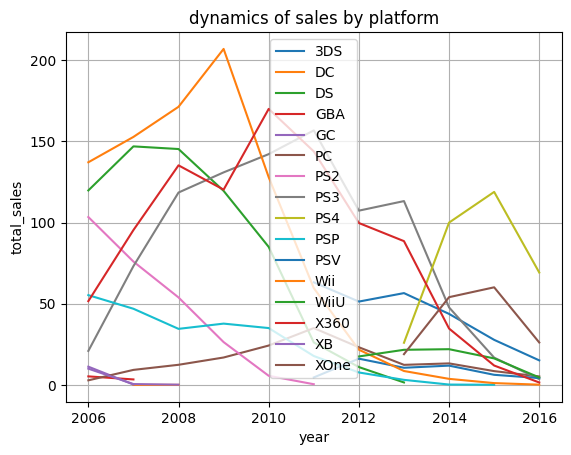

In [25]:
#Для наглядности, посмотрим динамику по продажам платформ на графике
x=range(2006,2017)
labels = sales.index
for i in range(len(sales)):
    y=sales.iloc[i] 
    plt.plot(x, y, label=labels[i])
    plt.xlabel("year")
    plt.ylabel("total_sales")
    plt.title("dynamics of sales by platform")
    plt.legend()
    plt.grid(True)

In [26]:
sales.sort_values(by=2016, ascending=False).head(3)

,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016
platform,,,,,,,,,,,
PS4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,25.99,100.00,118.90,69.25
XOne,NaN,NaN,NaN,NaN,NaN,NaN,NaN,18.96,54.07,60.14,26.15
3DS,NaN,NaN,NaN,NaN,NaN,63.2,51.36,56.57,43.76,27.78,15.14


На графике видно, что все платформы "падают" по продажам, даже те, которые появились совсем недавно. Потенциально прибыльными можно считать платформы: PS4, XOne, 3DS. Учитывая, что данные за 2016г. неполные - платформы XOne, PS4 могут показывать рост продаж.

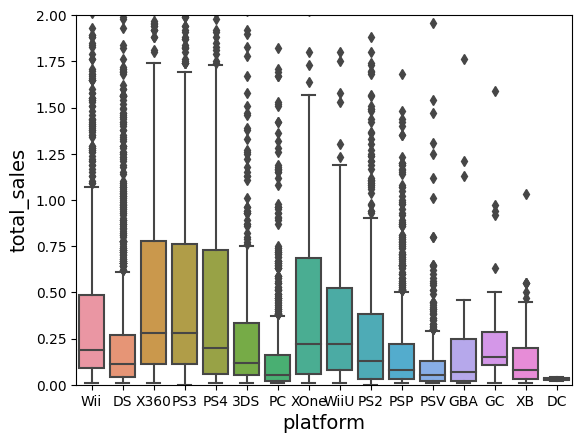

In [27]:
#Построим график «ящик с усами» по глобальным продажам игр в разбивке по платформам
boxplot = sns.boxplot(data=actual_data, x=actual_data['platform'], y=actual_data['total_sales'])
boxplot.set_xlabel("platform", fontsize=14)
boxplot.set_ylabel("total_sales", fontsize=14)
plt.ylim(0, 2)
plt.show()

Видно, что медиана большинства платформ находится ниже 0.25 млн проданных копий, расстояние между медианой и третьим квартилем значительно превышает расстояние между первым квартилем и медианой - значит там больший разброс значений. Все, что находится свыше 1.75 млн. можно считать выбросами. 
Худшие показатели у платформы DS (медиана около 0,1 млн. долларов. Лучшие медианные продажи у платформ PS3 и X360 - в районе 0,3 млн. копий. 

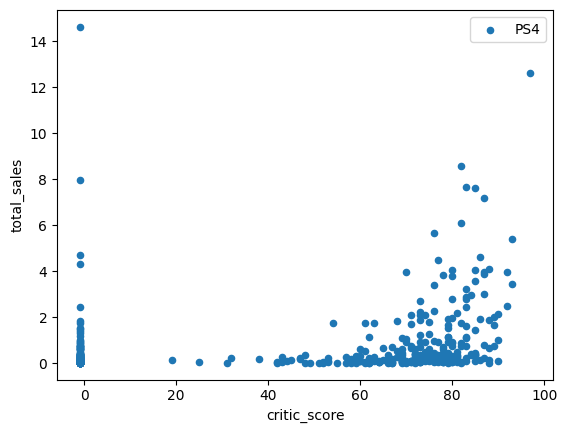

Корреляция между отзывами критиков и продажами составляет 0.22652606614612358


In [28]:
#Посмотрим, как влияют на продажи внутри одной популярной платформы отзывы пользователей и критиков
actual_data.query("platform=='PS4'").plot(x='critic_score', y='total_sales', kind='scatter', label='PS4') 
plt.show()
print('Корреляция между отзывами критиков и продажами составляет', actual_data.query("platform=='PS4'")['critic_score'].corr(actual_data.query("platform=='PS4'")['total_sales']))

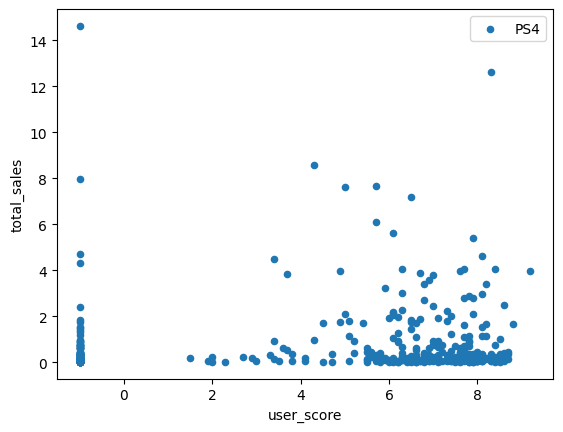

Корреляция между отзывами пользователей и продажами составляет 0.11596149312860109


In [29]:
actual_data.query("platform=='PS4'").plot(x='user_score', y='total_sales', kind='scatter', label='PS4') 
plt.show()
print('Корреляция между отзывами пользователей и продажами составляет', actual_data.query("platform=='PS4'")['user_score'].corr(actual_data.query("platform=='PS4'")['total_sales']))

Судя по диаграммам рассеяния зависимости между оценками критиков, пользователей и продажами не наблюдается, что подтверждает низкое значения коэффициентов корреляции.  

Однако, самые высокие продажи (свыше 6 млн. копий) имеют оценку пользователей выше 4-х и критиков выше 75.

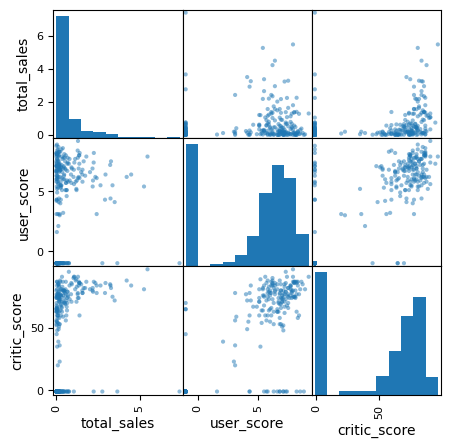

,total_sales,user_score,critic_score
total_sales,1.000000,0.121712,0.273782
user_score,0.121712,1.000000,0.781040
critic_score,0.273782,0.781040,1.000000


In [30]:
pd.plotting.scatter_matrix(actual_data.query("platform=='XOne'")[['total_sales', 'user_score', 'critic_score']], figsize=(5, 5)) 
plt.show()
actual_data.query("platform=='XOne'")[['total_sales', 'user_score', 'critic_score']].corr()

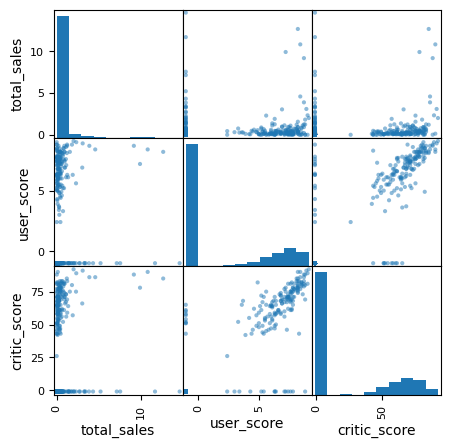

,total_sales,user_score,critic_score
total_sales,1.000000,0.146426,0.166381
user_score,0.146426,1.000000,0.908417
critic_score,0.166381,0.908417,1.000000


In [31]:
pd.plotting.scatter_matrix(actual_data.query("platform=='3DS'")[['total_sales', 'user_score', 'critic_score']], figsize=(5, 5)) 
plt.show()
actual_data.query("platform=='3DS'")[['total_sales', 'user_score', 'critic_score']].corr()

При изучении матриц рассеяния и коэффициентов корреляции для других популярных платформ - 3DS и XOne подтвердились те же наблюдения, что и для платформы PS4. Зависимости между оценками пользователей и критиков не наблюдается.

In [32]:
#Посмотрим на общее распределение игр по жанрам. Определим какие жанры самые прибыльные.
actual_data.groupby('genre').agg({'name':'count', 'total_sales':'sum'}).sort_values(by='total_sales', ascending=False)

,name,total_sales
genre,,
Action,2382,1116.65
Sports,1262,793.85
Shooter,737,717.04
Misc,1253,554.86
Role-Playing,996,522.40
Racing,562,299.00
Platform,340,279.74
Simulation,606,220.65
Fighting,413,188.42


При анализе количества игр по годам определен период с 1995-2016гг как перспективный для использования, так как за предыдущие 15 лет выпускалось очень мало игр.  

Срок жизни плаформы составляет, в среднем, 10,5 лет, поэтому актульный период для анализа это диапазон с 2006-2016 гг.  

Выбраны как перспективные с точки зрения прибыли платформы S4, XOne, 3DS. Все платформы продемонстрировали падение продаж, но с учетом того, что данные неполные за 2016г. платформы  XOne, PS4 еще могут продемонстрировать рост продаж.  

Лучшие медианные продажи у платформ PS3 и X360 - в районе 0,3 млн. копий. Остальные платформы демонстрируют медианные продажи в диапазоне 0.15-0.25 млн. копий. Худшие показатели у платформы DS. Согласно графиков боксплот все, что находится свыше 1.75 млн. можно считать выбросами.  

Для перспективных платформ проанализирована взаимосвязь между оценками пользователей и критиков и продажами, коэффициент корреляции составил 0.23 для оценок критиков и 0.12 для оценок пользователей.  

Самые прибыльные жанры это Action (с большим отрывом), Sports, Shooter, Misc и Role-Playing. По ним также наблюдается максимальное количество выпущенных игр, за исключением жанра Adventure - в нем выпущено много игр, но они оказались не такими прибыльными.  

Жанры с низкими продажами - это Adventure, Puzzle, Strategy - в последних двух так же представлено минимальное количество игр.

## 4. Портрет пользователя каждого региона

In [33]:
#Посмотрим на разницу в долях продаж для разных платформ по каждому региону
print(actual_data.groupby('platform')['na_sales'].sum().sort_values(ascending=False).head())
print(actual_data.groupby('platform')['eu_sales'].sum().sort_values(ascending=False).head())
print(actual_data.groupby('platform')['jp_sales'].sum().sort_values(ascending=False).head())

platform
X360    588.84
Wii     486.87
PS3     390.13
DS      323.99
PS2     114.89
Name: na_sales, dtype: float64
platform
PS3     327.21
X360    267.89
Wii     258.32
DS      142.99
PS4     141.09
Name: eu_sales, dtype: float64
platform
DS     141.49
3DS    100.62
PS3     79.41
PSP     70.63
Wii     68.28
Name: jp_sales, dtype: float64


Видно, что лидерами продаж в NA и EU являются одни и те же платформы - PS3, X360, Wii, DS.  
В регионе JP лидеры отличаются, это - DS, 3DS и PS3, видимо, у жителей данного региона другие предпочтения.  

Самые большие продажи - в регионе NA, затем EU и в разы меньше первых двух - в JP.

In [34]:
#Посмотрим на разницу в долях продаж для разных жанров по каждому региону
print(actual_data.groupby('genre')['na_sales'].sum().sort_values(ascending=False).head())
print(actual_data.groupby('genre')['eu_sales'].sum().sort_values(ascending=False).head())
print(actual_data.groupby('genre')['jp_sales'].sum().sort_values(ascending=False).head())

genre
Action          530.44
Sports          396.64
Shooter         373.13
Misc            285.06
Role-Playing    199.63
Name: na_sales, dtype: float64
genre
Action     350.70
Sports     251.55
Shooter    238.89
Misc       146.88
Racing     113.39
Name: eu_sales, dtype: float64
genre
Role-Playing    170.38
Action          102.07
Misc             64.53
Sports           48.97
Platform         35.20
Name: jp_sales, dtype: float64


По жанрам наблюдается схожая с платформами ситуация. В регионах NA и EU лидируют жанры Action, Sports, Shooter, Misc.  
В регионе JP действительно другие предпочтения - среди жанров лидирует Role-Playing.  

In [35]:
#Посмотрим на разницу в долях продаж для игр с разным рейтингом ESRB по каждому региону
print(actual_data.groupby('rating')['na_sales'].sum().sort_values(ascending=False).head())
print(actual_data.groupby('rating')['eu_sales'].sum().sort_values(ascending=False).head())
print(actual_data.groupby('rating')['jp_sales'].sum().sort_values(ascending=False).head())

rating
E       796.98
M       574.33
T       424.14
E10+    315.40
-1      274.50
Name: na_sales, dtype: float64
rating
E       461.09
M       398.90
T       235.44
-1      227.19
E10+    173.35
Name: eu_sales, dtype: float64
rating
-1      276.69
E       120.36
T        83.90
M        43.79
E10+     36.57
Name: jp_sales, dtype: float64


Лидерами продаж в регионах NA и EU являются игры с рейтингом E(everyone - для всех), M(mature - для взрослых), T(teen - для подростков).
В регионе JP играет больше подростков - на первом месте игры с рейтингом E, далее T и M.

Таким образом установлено, что вкусы регионов NA и EU во многом совпадают, однако регион NA демонстрирует большие продажи по сравнению с EU. Пользователи региона JP отличнаются от предыдущих как в выборе платформ, так и в выборе жанров игр. Согласно данным рейтинга ESRB самый популярные игры с пометкой E(everyone) во всех трех регионах. 

## 5. Проверка гипотез

Нулевая гипотеза H0: Средние пользовательские рейтинги платформ Xbox One и PC одинаковые  

Альтернативная гипотеза H1: Средние пользовательские рейтинги жанров Action (англ. «действие», экшен-игры) и Sports (англ. «спортивные соревнования») разные.

In [36]:
sample_1 = actual_data.loc[actual_data['platform']=="XOne", 'user_score']
sample_2 = actual_data.loc[actual_data['platform']=="PC", 'user_score']
alpha = 0.05

In [37]:
results = st.ttest_ind(
    sample_1, 
    sample_2)

print('p-значение:', results.pvalue)
if results.pvalue < alpha:
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу") 

p-значение: 0.009015724125638083
Отвергаем нулевую гипотезу


Нулевая гипотеза формулируется так, чтобы использовался знак "=", поэтому H0: Средние пользовательские рейтинги платформ Xbox One и PC одинаковые.  

После формулировки нулевой сформулирована альтернативная H1:Средние пользовательские рейтинги жанров Action (англ. «действие», экшен-игры) и Sports (англ. «спортивные соревнования») разные. Это утверждение будет верным, если H0 отбрасывается.  
Так как нужно сравнить два значения среднего двух генеральных совокупностей по взятым из них выборкам, используем для этого scipy.stats.ttest_ind. Предполагаем, что дисперсии выборок одинаковые.  

## 6. Выводы

Проанализировано какое количество игр выпускалось в разные годы. Наиболее интересным для анализа выглядит период с 1995-2016гг, так как за период с 1980-1995 выпускалось в разы меньше игр. С 1995 наблюдался постоянный рост количества выпущенных игр с 219 штук до 1427 в 2008г. Далее наблюдается постепенный спад до 606 штук за 2015г (данные за 2016г. - неполные).

Выявлено, что “срок жизни” платформы составляет, в среднем, 10 лет поэтому выбран актуальный период для анализа начиная с 2006г. Предыдущие годы в дальнейшем не учитывались.

Все платформы демонстрируют “падение” продаж, потенциально прибыльными выбраны S4, XOne, 3DS. Учитывая, что данные за 2016г. неполные - платформы XOne, PS4 могут показывать рост продаж.

При анализе глобальных продаж по платформам установлено, что медианные продажи большинства платформ находятся в диапазоне 0.2-0.25 млн.копий. Все, что находится свыше 1.75 млн. можно считать выбросами. Худшие показатели у платформы DS (медиана около 0,1 млн. долларов. Лучшие медианные продажи у платформ PS3 и X360 - в районе 0,3 млн. копий.

Для платформы PS4 корреляция между отзывами критиков и продажами составляет 0.23. Корреляция между отзывами пользователей и продажами составляет 0.12

На диаграммах рассеяния так же не наблюдается сильной взаимосвязи между данными параметрами, однако самые высокие продажи (свыше 6 млн. копий) имеют оценку пользователей выше 4-х (максимум 10) и критиков выше 75 (максимум 100).
Аналогичные диаграммы зависимости оценок от продаж продемонстрировали платформы XOne и 3DS.

Среди жанров самыми прибыльными являются Action - 1116.65,  Sports - 793.85, Shooter - 717.04, Misc - 554.86, Role-Playing - 522.40млн. копий соответственно. По ним также наблюдается максимальное количество выпущенных игр (Action - 2382, Sports - 1262, Shooter - 737, Misc  - 1253, Role-Playing - 996), за исключением жанра Adventure - в нем выпущено 1023 игры, но они оказались не такими прибыльными. 

Жанры с низкими продажами - это Adventure, Puzzle, Strategy - в последних двух так же представлено минимальное количество игр.

Установлено, что лидерами продаж в регионах NA и EU являются одни и те же платформы -  - PS3, X360, Wii, DS. В регионе JP предпочитают платформы DS, 3DS и PS3. Самые большие продажи - в регионе NA, затем EU и в разы меньше первых двух - в JP.  

По предпочитаемым жанрам вкусы представителей NA и EU так же сходятся, лидерами являются Action, Sports, Shooter, Misc. В регионе JP действительно другие предпочтения - среди жанров лидирует Role-Playing, который не поднимался выше пятой строчки в других регионах.  

По рейтингу ESRB самыми покупаемыми в регионах NA и EU являются игры с рейтингом E(everyone - для всех), M(mature - для взрослых), T(teen - для подростков). В регионе JP играет больше подростков - на первом месте игры с рейтингом E, далее T и M.  